#### Practice KNN - We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car or not.

### Import  Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt


In [2]:
df=pd.read_csv("User_Data.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
df.drop('User ID',axis=1,inplace=True)

In [4]:
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [5]:
df.ndim

2

In [6]:
df.shape

(400, 4)

In [7]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [10]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [11]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.isna().any()

Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

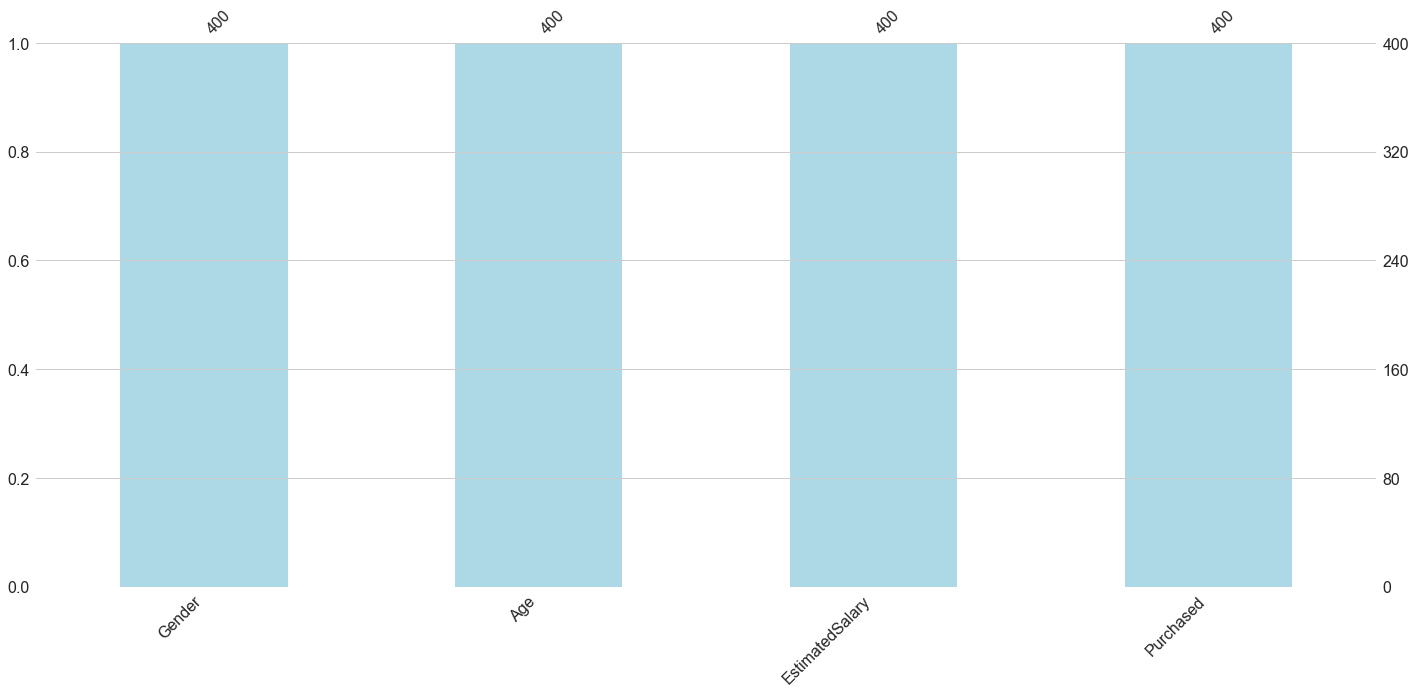

In [60]:
import missingno as msno
msno.bar(df,color='lightblue')
plt.show()

In [14]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [15]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [16]:
df.groupby('Purchased').mean()

,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


In [17]:
df.groupby('Purchased').std()

,Age,EstimatedSalary
Purchased,,
0,7.985844,24351.570102
1,8.612172,42064.200064


In [18]:
df.groupby('Purchased').var()

,Age,EstimatedSalary
Purchased,,
0,63.773711,5.929990e+08
1,74.169507,1.769397e+09


### Data Visualization

In [19]:
import pingouin as pg

In [20]:
def plot_num(a):
    fig,axes=plt.subplots(3,2,figsize=(10,12))
    sns.histplot(x=df[a],kde=True,bins=10,ax=axes[0][0])
    pg.qqplot(df[a],dist='norm',ax=axes[0][1])
    sns.barplot(x=df.Purchased,y=df[a],ax=axes[1][0])
    sns.stripplot(x=df.Purchased,y=df[a],ax=axes[1][1])
    sns.boxplot(y=df[a],x=df.Purchased,hue='Purchased',data=df,ax=axes[2][0])
    pg.plot_blandaltman(x=df.Purchased, y=df[a],ax=axes[2][1])
    plt.suptitle(a.title())
    plt.show()

D:\anaconda\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


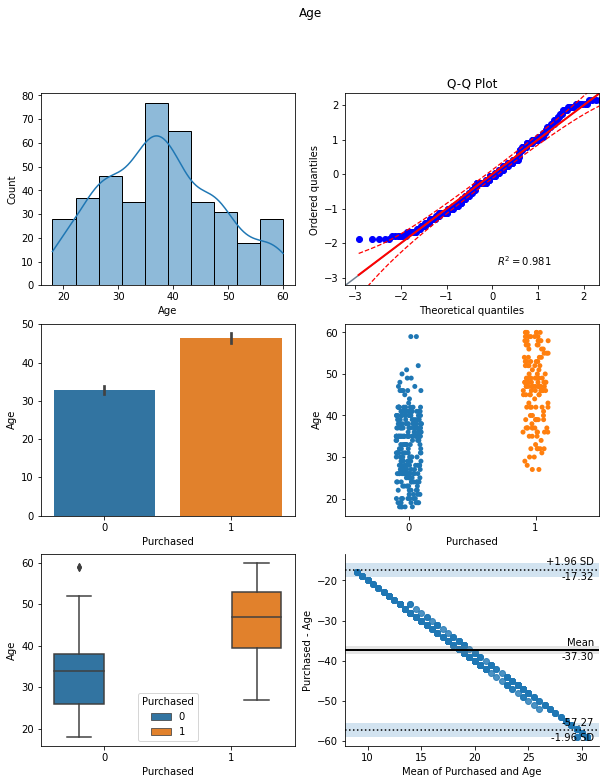

In [21]:
plot_num('Age')

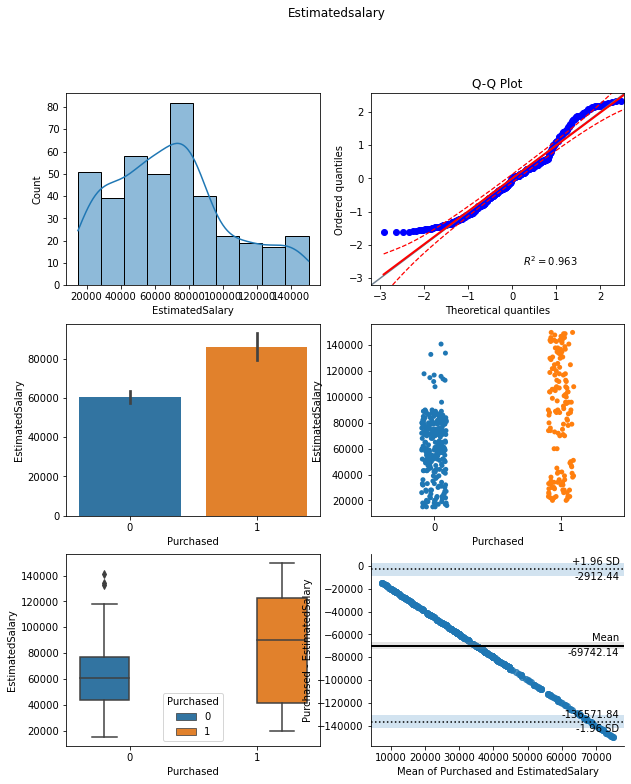

In [22]:
plot_num('EstimatedSalary')

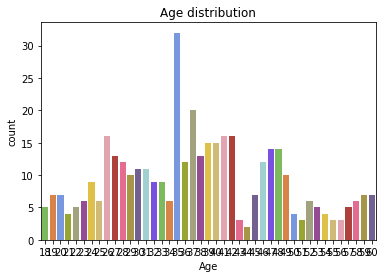

In [23]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

sns.countplot(x='Age', data=df, palette=color_types).set_title('Age distribution');

In [24]:

def plot_cat(a):
    fig,axes=plt.subplots(2,2,figsize=(10,12))
    df[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=df[a],shadow = True,
startangle = 180,autopct='%.0f%%',ax=axes[0][0])
    df[a].value_counts().plot.bar(ax=axes[0][1])
    sns.scatterplot(x=df.Age ,y=df.EstimatedSalary,hue=df[a],ax=axes[1][0],palette='Blues_r')
    sns.stripplot(x=df[a],y=df.EstimatedSalary,hue=df.Purchased,ax=axes[1][1],palette='Blues_r')
    fig.suptitle("Count of"+a.title())
    plt.show()
    

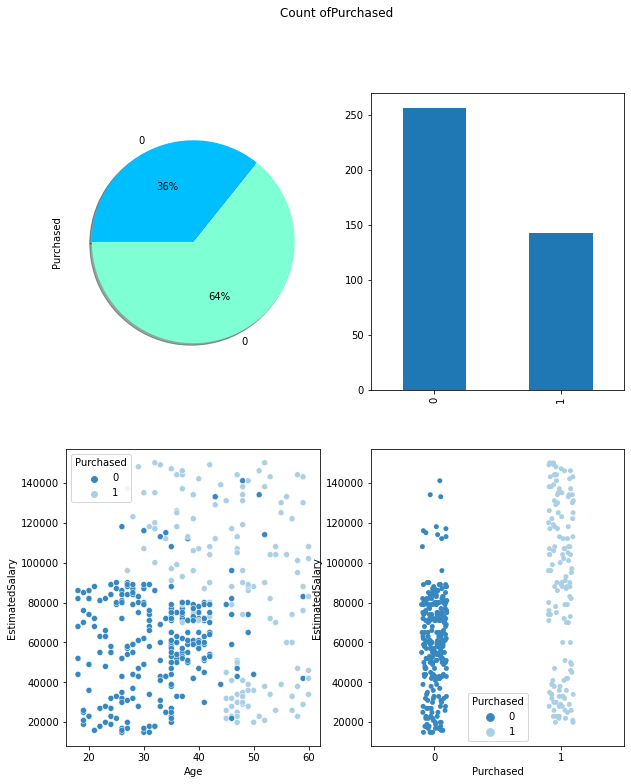

In [25]:
plot_cat('Purchased')

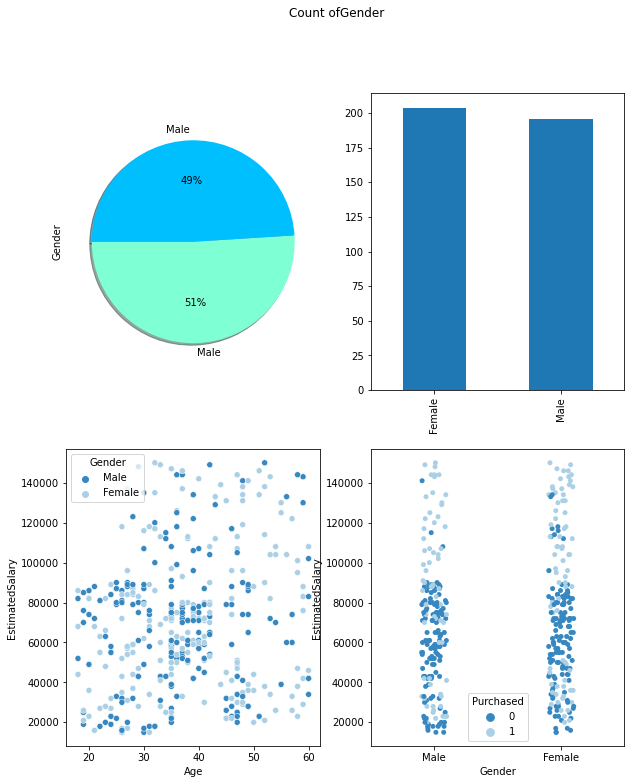

In [26]:
plot_cat('Gender')

In [27]:
def plot_kde(a):
    facet=sns.FacetGrid(df,hue='Purchased',aspect=4,palette='PuBu')
    facet.map(sns.kdeplot,a,shade=True)
    facet.set(xlim=(0,df[a].max()))
    plt.title(a.title())
    plt.show()

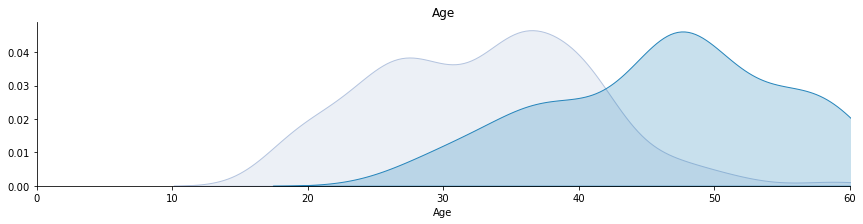

In [28]:
plot_kde('Age')

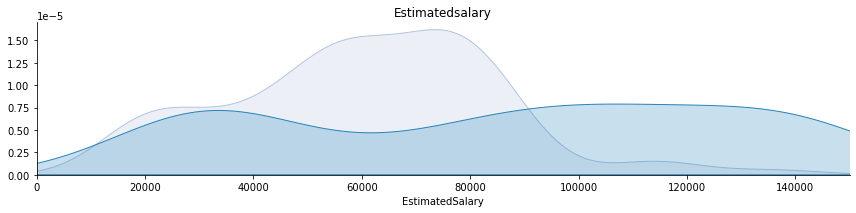

In [29]:
plot_kde('EstimatedSalary')

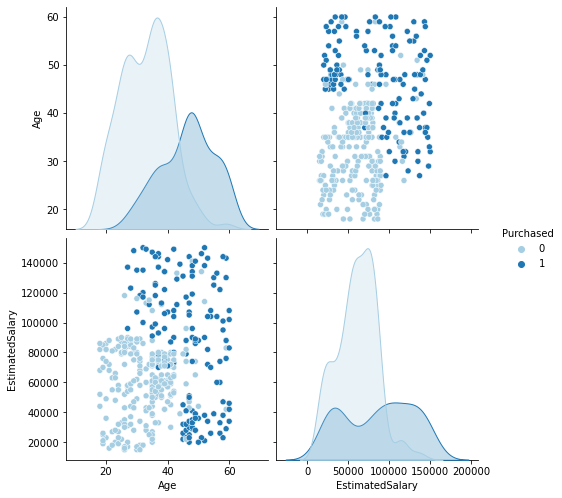

In [30]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Purchased',height=3.5)
plt.show()


### Data Preprocessing

In [31]:
import  yellowbrick
from sklearn.preprocessing import LabelEncoder
label_Enc =LabelEncoder()

In [32]:
df.Gender =label_Enc.fit_transform(df.Gender)

In [33]:
label_Enc.classes_

array(['Female', 'Male'], dtype=object)

In [34]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


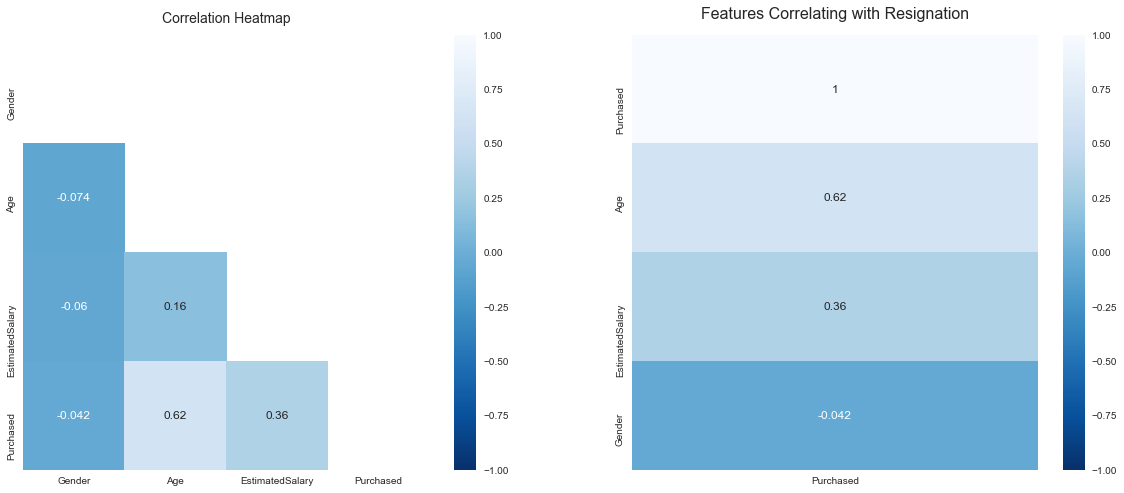

In [35]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='Blues_r')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Purchased']].sort_values(by='Purchased',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='Blues_r')
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':16}, pad=16);

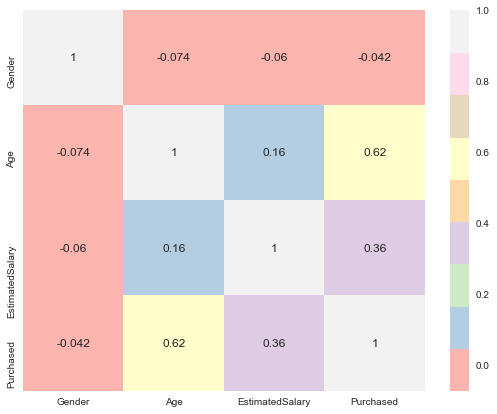

In [36]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()

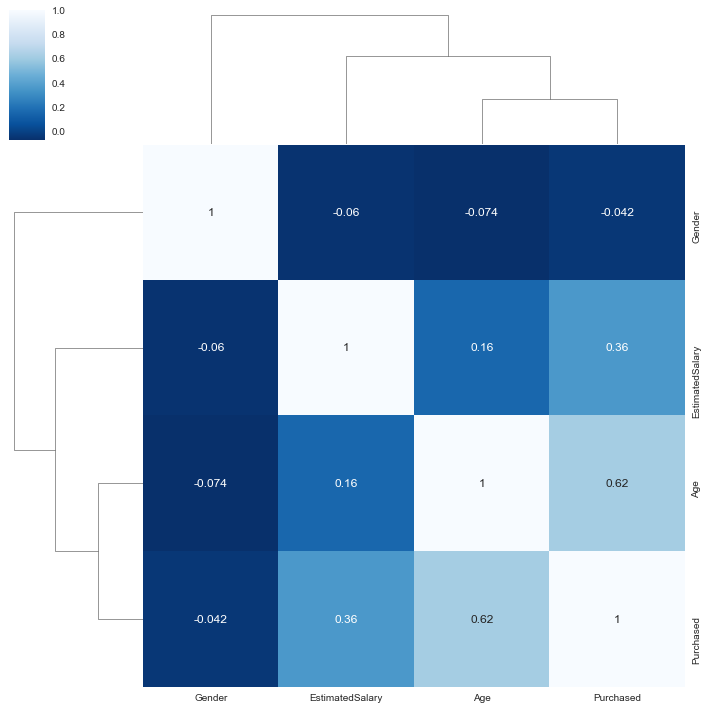

In [37]:
sns.clustermap(df.corr(),annot=True,cmap='Blues_r')

### Dataset Splitting

In [38]:
X=df.drop(['Purchased'],axis=1)
y=df['Purchased']

In [39]:
X[:3]

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000


In [40]:
y[:3]

0    0
1    0
2    0
Name: Purchased, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state =42)

In [42]:
X_train[:5]

,Gender,Age,EstimatedSalary
65,1,24,58000
179,0,31,34000
109,0,38,80000
379,0,58,23000
325,0,41,60000


In [43]:
X_test[:5]

,Gender,Age,EstimatedSalary
331,0,48,119000
92,1,26,15000
1,1,35,20000
234,0,38,112000
136,0,20,82000


### KNN Classifier

In [44]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=2)


In [46]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [47]:
y_pred=knn_clf.predict(X_test)

In [48]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 0.75


In [49]:
print("Recall Score",recall_score(y_test,y_pred))

Recall Score 0.3793103448275862


In [50]:
print("Precision Score :",precision_score(y_test,y_pred))

Precision Score : 0.8461538461538461


In [51]:
print("F1 Score :",f1_score(y_test,y_pred))

F1 Score : 0.5238095238095238


### ROC Curve

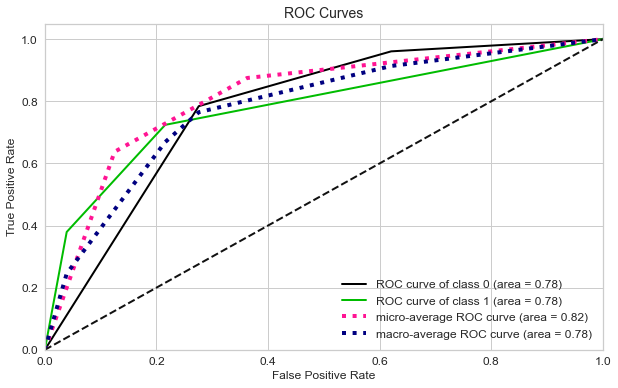

In [52]:
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Precision Recall Curve

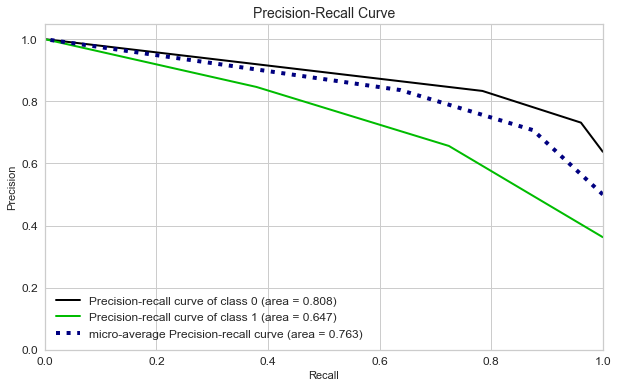

In [53]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Learning Curve

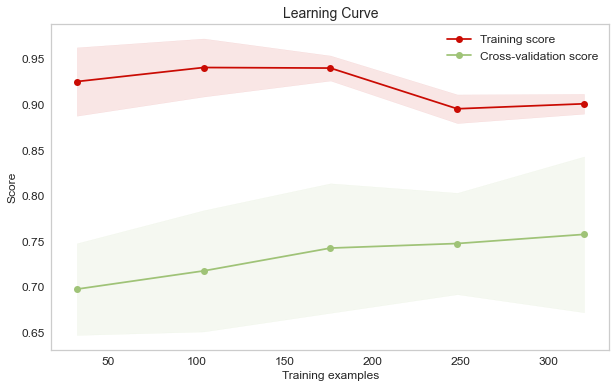

In [54]:
skplt.estimators.plot_learning_curve(knn_clf, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Lift Curve

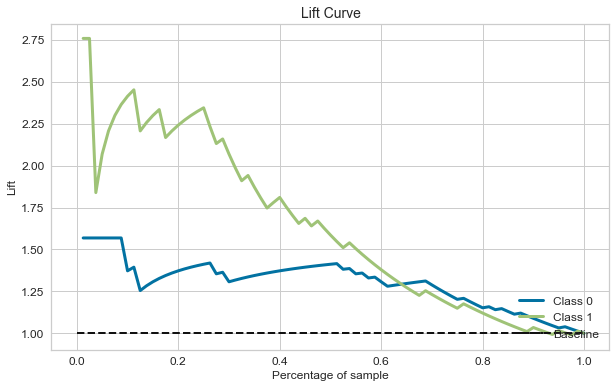

In [55]:
skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Confusion Matrix

In [56]:
confusion_matrix(y_test, y_pred)

array([[49,  2],
       [18, 11]], dtype=int64)

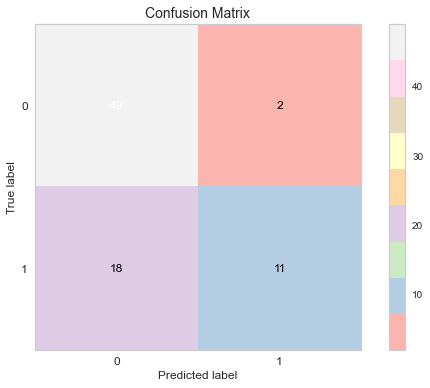

In [57]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
plt.show()

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        51
           1       0.85      0.38      0.52        29

    accuracy                           0.75        80
   macro avg       0.79      0.67      0.68        80
weighted avg       0.77      0.75      0.72        80



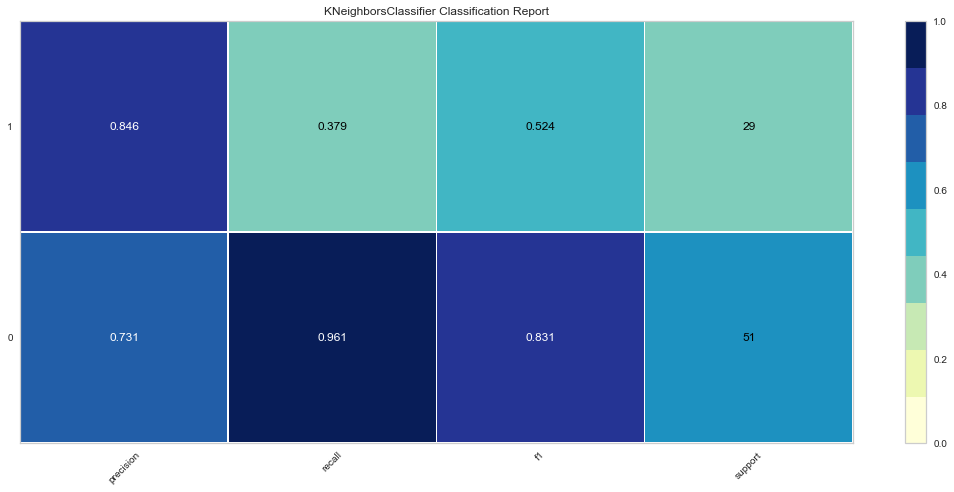

In [59]:
import yellowbrick as yb
plt.figure(figsize=(15,7))
visualizer = yb.classifier.classification_report(knn_clf, X_train, y_train, X_test, y_test,  support=True,cmap="YlGnBu")
visualizer.show()
plt.show()